In [1]:
import pandas as pd
import numpy as np
import torch
import gc
import torch.nn as nn
from tqdm import tqdm_notebook as tqdm
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import random
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pymop import Problem
import optuna
import os

## Data

In [2]:
#TODO Betriebsystem unterscheidung
from pathlib import Path
import platform
from data.DataLoader import load_UCR_dataset
dataset='GunPoint'
train_x,train_y,test_x,test_y=load_UCR_dataset(dataset)

In [3]:

from models.UCRDataset import UCRDataset
from models.CNN_TSNet import CNN_TSNet
from models.CNN_TSNet import get_all_preds
from models.UCRDataset import UCRDataset
stride = 1
kernel_size=10
padding = kernel_size - 1
input_size= train_x.shape[-1]
device = torch.device( "cpu")#"cuda:0" if torch.cuda.is_available() else
model = CNN_TSNet(kernel_size=kernel_size, stride=stride, padding=padding, input_size= input_size).to(device)
model.load_state_dict(torch.load('gunpoint_best_state'))

test_dataset = UCRDataset(test_x,test_y)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=True)


In [4]:
observation_01, label_01 = test_dataset[0]

## MOC


In [5]:
from CounterfactualExplanation import Explanation
exp =Explanation(model= model,data=(test_x,test_y), backend='torch')

In [6]:
#pop,logbook=exp.explain_instance(observation_01,np.array([[1,0]]))
pop,logbook=exp.explain_instance(observation_01,np.array([[1,0]]))

Reference Set not Target
y (150,)
y [0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1
 1 0]
original (1, 2)
0
ReferenceSet class [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Reference Set from Explanation (74, 1, 150)
(1, 1, 150)
Binary Case
Predict Torch


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqu

   	   	     	              stats_y_distance             	              stats_x_distance             	           stats_changed_features          
   	   	     	-------------------------------------------	-------------------------------------------	-------------------------------------------
gen	pop	evals	std     	min	avg     	max	std    	min     	avg     	max	std     	min     	avg   	max
0  	   	100  	0       	1  	1       	1  	0      	1       	1       	1  	0       	1       	1     	1  
0  	   	100  	0.172511	0  	0.965443	1  	0.16091	0.137241	0.967183	1  	0.131201	0.246667	0.9734	1  
1  	   	100  	0.333299	0  	0.856733	1  	0.279378	0.0961499	0.879387	1  	0.214836	0.0666667	0.9132	1  
2  	   	100  	0.466429	0  	0.592856	1  	0.377636	0.0754474	0.671747	1  	0.295771	0.0666667	0.768333	1  
3  	   	100  	0.109267	0  	0.0583325	0.406176	0.10353 	0.0754474	0.249315	0.531681	0.215444	0.0666667	0.474267	1  


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


4  	   	100  	0.0906909	0  	0.0316806	0.406176	0.0455894	0.0754474	0.170213	0.26904 	0.121271	0.0666667	0.319067	0.64
5  	   	100  	0.0575768	0  	0.0147932	0.284592	0.0301382	0.0754474	0.140923	0.23939 	0.100513	0.0666667	0.261067	0.42
6  	   	100  	0.07369  	0  	0.0223223	0.292651	0.0273783	0.0754474	0.128655	0.167746	0.0974993	0.0666667	0.219667	0.373333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


7  	   	100  	0.0861442	0  	0.0309189	0.292651	0.0241958	0.0754474	0.117553	0.166565	0.0837317	0.0666667	0.177   	0.36    
8  	   	100  	0.0967176	0  	0.0401923	0.3052  	0.0250902	0.0754474	0.110995	0.166565	0.0804557	0.0666667	0.147133	0.36    
9  	   	100  	0.0821956	0  	0.0272093	0.304243	0.0245856	0.0731103	0.110204	0.166565	0.0713964	0.0533333	0.1284  	0.36    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


10 	   	100  	0.042587 	0  	0.00614245	0.304243	0.025076 	0.0731103	0.112992	0.166565	0.059988 	0.0533333	0.107867	0.36    
11 	   	100  	0.042589 	0  	0.00612301	0.304243	0.0171927	0.0731103	0.1027  	0.159883	0.0536012	0.0533333	0.0910667	0.3     
12 	   	100  	0.0425882	0  	0.00612836	0.304243	0.0161521	0.0731103	0.100332	0.159883	0.0422313	0.0533333	0.0830667	0.3     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


13 	   	100  	0.0425871	0  	0.00613638	0.304243	0.0169567	0.0731103	0.100783	0.159883	0.0451199	0.0533333	0.0858667	0.3     
14 	   	100  	0.0583722	0  	0.0102196 	0.407484	0.0187322	0.0644569	0.101375	0.159883	0.0507413	0.0533333	0.0909333	0.3     
15 	   	100  	0.0668027	0  	0.0135978 	0.407484	0.0138081	0.0644569	0.096951	0.159883	0.0209338	0.0533333	0.0773333	0.153333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


16 	   	100  	0.0730234	0  	0.0168073 	0.38627 	0.0152507	0.0612468	0.0954721	0.159883	0.0200749	0.0533333	0.077    	0.14    
17 	   	100  	0.0730349	0  	0.0167558 	0.38627 	0.0141751	0.0612468	0.0964831	0.159883	0.0190217	0.0533333	0.0755333	0.14    
18 	   	100  	0.00926054	0  	0.00100033	0.0931141	0.0146768	0.0546444	0.098376 	0.159883	0.0184029	0.0533333	0.0746667	0.14    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


19 	   	100  	0.00926054	0  	0.00100034	0.0931141	0.0136792	0.0546444	0.097744 	0.159883	0.0184765	0.0533333	0.0744667	0.14    
20 	   	100  	0.0130282 	0  	0.00193028	0.0931141	0.0146547	0.0546444	0.0971286	0.159883	0.0177133	0.0533333	0.0734667	0.14    
21 	   	100  	0.01303   	0  	0.00191562	0.0931141	0.0143521	0.0546444	0.0975187	0.159883	0.0176363	0.0533333	0.0730667	0.14    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


22 	   	100  	0.01303   	0  	0.00191566	0.0931141	0.0140688	0.0546444	0.0968462	0.159883	0.016722 	0.0533333	0.0718667	0.14    
23 	   	100  	0.01303   	0  	0.00191571	0.0931141	0.00860644	0.0546444	0.094787 	0.122158	0.00992326	0.0533333	0.0692   	0.106667
24 	   	100  	0.01303   	0  	0.00191571	0.0931141	0.00860644	0.0546444	0.094787 	0.122158	0.00992326	0.0533333	0.0692   	0.106667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


25 	   	100  	0.013029  	0  	0.00192374	0.0931141	0.00884847	0.0546444	0.0947172	0.122158	0.0109729 	0.0533333	0.0702   	0.106667
26 	   	100  	0.0130277 	0  	0.00193645	0.0931141	0.00917528	0.0546444	0.0944614	0.122158	0.0107188 	0.0533333	0.0695333	0.106667
27 	   	100  	0.01303   	0  	0.0019157 	0.0931141	0.00861881	0.0546444	0.0948318	0.122158	0.0100302 	0.0533333	0.0694667	0.106667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


28 	   	100  	0.0130289 	0  	0.00192537	0.0931141	0.00928341	0.0546444	0.0949553	0.122158	0.0108916 	0.0533333	0.0702   	0.106667
29 	   	100  	0.0130288 	0  	0.00192596	0.0931141	0.00947052	0.0546444	0.0949399	0.122158	0.0115121 	0.0533333	0.0706   	0.106667
30 	   	100  	0.015871  	0  	0.00287912	0.0931141	0.0105499 	0.0546444	0.0936841	0.122158	0.011199  	0.0533333	0.0706   	0.1     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


31 	   	100  	0.0130277 	0  	0.00193645	0.0931141	0.00952909	0.0546444	0.0943342	0.122158	0.0103062 	0.0533333	0.0699333	0.1     
32 	   	100  	0.0130254 	0  	0.00195673	0.0931141	0.0100624 	0.0546444	0.0939852	0.122158	0.0153436 	0.0533333	0.0718   	0.18    
33 	   	100  	0.0130221 	0  	0.00198581	0.0931141	0.0109158 	0.0546444	0.0935638	0.122158	0.0204139 	0.0533333	0.0737333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


34 	   	100  	0.0130187 	0  	0.00201469	0.0931141	0.0117344 	0.0546444	0.0932233	0.122158	0.026556  	0.0533333	0.0776667	0.206667
35 	   	100  	0.013021  	0  	0.00199484	0.0931141	0.0118809 	0.0546444	0.0940732	0.122158	0.022745  	0.0533333	0.076    	0.206667
36 	   	100  	0.0130166 	0  	0.00203156	0.0931141	0.0119755 	0.0546444	0.0928566	0.122158	0.0230604 	0.0533333	0.0762   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


37 	   	100  	0.0130183 	0  	0.00201599	0.0931141	0.0121627 	0.0546444	0.0935165	0.122158	0.0238678 	0.0533333	0.0778667	0.206667
38 	   	100  	0.0202557 	0  	0.00483454	0.0931141	0.0155558 	0.0546444	0.092969 	0.122158	0.0353122 	0.0533333	0.0862667	0.206667
39 	   	100  	0.0251977 	0  	0.00767413	0.0931141	0.016214  	0.0546444	0.0897641	0.122158	0.0262923 	0.0533333	0.0820667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


40 	   	100  	0.0290544 	0  	0.0104777 	0.0931141	0.0163764 	0.0546444	0.0873827	0.122158	0.0268721 	0.0533333	0.0803333	0.206667
41 	   	100  	0.0265852 	0  	0.00876585	0.0931141	0.0165256 	0.0546444	0.0889002	0.122158	0.0325876 	0.0533333	0.0854   	0.206667
42 	   	100  	0.0157549 	0  	0.00337066	0.0931141	0.0144621 	0.0546444	0.0895869	0.122158	0.028594  	0.0533333	0.0862667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


43 	   	100  	0.0157347 	0  	0.00347797	0.0931141	0.0149967 	0.0546444	0.0872499	0.122158	0.028852  	0.0533333	0.0900667	0.206667
44 	   	100  	0.0180014 	0  	0.00463881	0.0931141	0.0164746 	0.0546444	0.0888303	0.122158	0.0351643 	0.0533333	0.0939333	0.206667
45 	   	100  	0.027132  	0  	0.0105813 	0.0931141	0.0171857 	0.0546444	0.0851422	0.122158	0.0277849 	0.0533333	0.0886667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


46 	   	100  	0.0249615 	0  	0.00885294	0.0931141	0.0166066 	0.0546444	0.0855695	0.122158	0.0289907 	0.0533333	0.0890667	0.206667
47 	   	100  	0.0181654 	0  	0.00544897	0.0931141	0.0159417 	0.0546444	0.0864876	0.122158	0.0298186 	0.0533333	0.0919333	0.206667
48 	   	100  	0.0182336 	0  	0.00590726	0.0931141	0.0170679 	0.0546444	0.0870662	0.122158	0.030371  	0.0533333	0.0954   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


49 	   	100  	0.0244706 	0  	0.00938177	0.0931141	0.0169819 	0.0546444	0.0849653	0.122158	0.0306866 	0.0533333	0.0916667	0.206667
50 	   	100  	0.0195468 	0  	0.00589185	0.0931141	0.0170623 	0.0546444	0.0880548	0.122158	0.0307228 	0.0533333	0.0912   	0.206667
51 	   	100  	0.0196756 	0  	0.00647728	0.0931141	0.0167206 	0.0546444	0.0867281	0.122158	0.0295064 	0.0533333	0.0902   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


52 	   	100  	0.0208686 	0  	0.0070053 	0.0931141	0.016671  	0.0546444	0.0865072	0.122158	0.0293045 	0.0533333	0.0894   	0.206667
53 	   	100  	0.0208581 	0  	0.00706013	0.0931141	0.013707  	0.0546444	0.0841492	0.110331	0.021142  	0.0533333	0.0848667	0.14    
54 	   	100  	0.0222376 	0  	0.00809331	0.0931141	0.0142168 	0.0546444	0.0830919	0.110331	0.0215716 	0.0533333	0.086    	0.14    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


55 	   	100  	0.042596  	0  	0.0136481 	0.35962  	0.0147871 	0.0536109	0.0816508	0.110331	0.0210408 	0.0533333	0.0855333	0.14    
56 	   	100  	0.0546823 	0  	0.0176991 	0.35962  	0.0155382 	0.0536109	0.0812938	0.110331	0.0215802 	0.0533333	0.0869333	0.14    
57 	   	100  	0.054984  	0  	0.0191733 	0.35962  	0.0159708 	0.0536109	0.0805184	0.110331	0.0218423 	0.0533333	0.0877333	0.14    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


58 	   	100  	0.0546168 	0  	0.0188226 	0.35962  	0.0164425 	0.0536109	0.0808927	0.120766	0.0234321 	0.0533333	0.0887333	0.153333
59 	   	100  	0.0655816 	0  	0.0238958 	0.382371 	0.0162662 	0.0490363	0.0785428	0.120722	0.0246994 	0.0533333	0.0896   	0.153333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


60 	   	100  	0.0746254 	0  	0.0279827 	0.382371 	0.0169752 	0.0490363	0.0784267	0.120722	0.0243581 	0.0533333	0.0898667	0.153333
61 	   	100  	0.0824948 	0  	0.0316157 	0.382371 	0.0171755 	0.0490363	0.0783787	0.120722	0.0238532 	0.0533333	0.0894   	0.153333
62 	   	100  	0.0894108 	0  	0.0369227 	0.382371 	0.0177018 	0.0490363	0.0775868	0.120722	0.0242596 	0.0533333	0.0906   	0.153333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


63 	   	100  	0.089608  	0  	0.0386946 	0.385212 	0.0179375 	0.0484497	0.0773192	0.120722	0.0238603 	0.0533333	0.0901333	0.153333
64 	   	100  	0.101676  	0  	0.0472733 	0.386695 	0.018322  	0.0481088	0.0760996	0.120722	0.0238159 	0.0533333	0.0894   	0.153333
65 	   	100  	0.106213  	0  	0.0506669 	0.386695 	0.0183678 	0.0481088	0.0758646	0.120722	0.0246586 	0.0533333	0.0888667	0.173333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


66 	   	100  	0.110908  	0  	0.0550091 	0.386695 	0.0185053 	0.0481088	0.0752434	0.120722	0.0248029 	0.0533333	0.0885333	0.173333
67 	   	100  	0.119277  	0  	0.0622765 	0.386695 	0.0188341 	0.0481088	0.0749072	0.120722	0.0215877 	0.0533333	0.0858667	0.14    
68 	   	100  	0.113572  	0  	0.0590424 	0.386695 	0.016705  	0.0481088	0.0730764	0.109296	0.0219473 	0.0533333	0.0859333	0.14    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


69 	   	100  	0.122873  	0  	0.0607072 	0.386695 	0.0169956 	0.0481088	0.0745332	0.109296	0.0227742 	0.0533333	0.0867333	0.14    
70 	   	100  	0.12296   	0  	0.0612418 	0.386695 	0.0170988 	0.0481088	0.0745324	0.109296	0.0227973 	0.0533333	0.0861333	0.14    
71 	   	100  	0.125061  	0  	0.0625139 	0.386695 	0.017168  	0.0481088	0.0748781	0.109296	0.0229662 	0.0533333	0.0856667	0.14    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


72 	   	100  	0.125119  	0  	0.0634644 	0.386695 	0.0174899 	0.0481088	0.0755863	0.109296	0.020267  	0.0533333	0.0827333	0.133333
73 	   	100  	0.123048  	0  	0.0623188 	0.386695 	0.0174014 	0.0481088	0.0749295	0.109296	0.0201788 	0.0533333	0.0818667	0.133333
74 	   	100  	0.123147  	0  	0.0616354 	0.386695 	0.0173844 	0.0481088	0.0753069	0.109296	0.0201082 	0.0533333	0.0821333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


75 	   	100  	0.124801  	0  	0.0635919 	0.386695 	0.017395  	0.0481088	0.0750348	0.109296	0.0200484 	0.0533333	0.0828   	0.133333
76 	   	100  	0.116389  	0  	0.0564079 	0.386695 	0.0171842 	0.0481088	0.0755264	0.109296	0.0193047 	0.0533333	0.0828667	0.133333
77 	   	100  	0.116513  	0  	0.056122  	0.386695 	0.0172167 	0.0481088	0.0760175	0.109296	0.0198746 	0.0533333	0.083    	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


78 	   	100  	0.118262  	0  	0.0595211 	0.386695 	0.0175432 	0.0481088	0.0755692	0.109296	0.0194295 	0.0533333	0.0812667	0.133333
79 	   	100  	0.104315  	0  	0.0481482 	0.386695 	0.0170037 	0.0481088	0.0762548	0.109296	0.0192023 	0.0533333	0.0804   	0.133333
80 	   	100  	0.110687  	0  	0.0544644 	0.386695 	0.0171941 	0.0481088	0.0753142	0.109296	0.0187337 	0.0533333	0.0796   	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


81 	   	100  	0.116979  	0  	0.0608384 	0.386695 	0.0175546 	0.0481088	0.0748781	0.109296	0.0178567 	0.0533333	0.0789333	0.133333
82 	   	100  	0.123621  	0  	0.0637465 	0.386695 	0.0177939 	0.0481088	0.0754958	0.109296	0.0183322 	0.0533333	0.0781333	0.133333
83 	   	100  	0.120035  	0  	0.0610181 	0.386695 	0.0177464 	0.0481088	0.0756533	0.109296	0.0180892 	0.0533333	0.0784   	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


84 	   	100  	0.123188  	0  	0.0651362 	0.386695 	0.0179115 	0.0481088	0.0748228	0.109296	0.018002  	0.0533333	0.0785333	0.133333
85 	   	100  	0.123002  	0  	0.0658112 	0.386695 	0.0178164 	0.0481088	0.0742962	0.109296	0.0183316 	0.0533333	0.0788667	0.133333
86 	   	100  	0.122968  	0  	0.0658911 	0.386695 	0.0180711 	0.0481088	0.0744662	0.109296	0.0195732 	0.0533333	0.08     	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


87 	   	100  	0.122324  	0  	0.0654726 	0.386695 	0.0180818 	0.0481088	0.0747891	0.109296	0.0193214 	0.0533333	0.0798667	0.133333
88 	   	100  	0.12223   	0  	0.0656832 	0.386695 	0.0181877 	0.0481088	0.074714 	0.109296	0.0205805 	0.0533333	0.0806667	0.133333
89 	   	100  	0.125931  	0  	0.0697532 	0.386695 	0.018232  	0.0481088	0.0739091	0.109296	0.0197747 	0.0533333	0.0797333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


90 	   	100  	0.125767  	0  	0.0698517 	0.386695 	0.018229  	0.0481088	0.0735349	0.109296	0.0197868 	0.0533333	0.0802   	0.133333
91 	   	100  	0.125609  	0  	0.0707531 	0.386695 	0.0182573 	0.0481088	0.0733118	0.109296	0.0199211 	0.0533333	0.0798   	0.133333
92 	   	100  	0.125951  	0  	0.0715019 	0.386695 	0.0182296 	0.0481088	0.0730276	0.109296	0.0198271 	0.0533333	0.0795333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


93 	   	100  	0.12933   	0  	0.0752657 	0.386695 	0.0184033 	0.0481088	0.0728553	0.109296	0.0195518 	0.0533333	0.0788667	0.133333
94 	   	100  	0.129556  	0  	0.0747743 	0.386695 	0.0183708 	0.0481088	0.073081 	0.109296	0.0206666 	0.0533333	0.0799333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


95 	   	100  	0.129446  	0  	0.0749977 	0.386695 	0.0184087 	0.0481088	0.072877 	0.109296	0.0194822 	0.0533333	0.0786667	0.133333
96 	   	100  	0.12589   	0  	0.0711803 	0.386695 	0.0183387 	0.0481088	0.0732443	0.109296	0.0195117 	0.0533333	0.0786   	0.133333
97 	   	100  	0.132496  	0  	0.0776957 	0.386695 	0.0184215 	0.0481088	0.0727868	0.109296	0.0185063 	0.0533333	0.0780667	0.133333
98 	   	100  	0.123852  	0  	0.068005  	0.386695 	0.0185257 	0.0481088	0.0733452	0.109296	0.0183229 	0.0533333	0.0779333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


99 	   	100  	0.127249  	0  	0.0729083 	0.386695 	0.0186462 	0.0481088	0.0728215	0.109296	0.0182594 	0.0533333	0.0781333	0.133333
100	   	100  	0.126768  	0  	0.0727059 	0.386695 	0.0179955 	0.0481088	0.0721835	0.109296	0.0186638 	0.0533333	0.0778667	0.133333
101	   	100  	0.126551  	0  	0.0731035 	0.386695 	0.0179309 	0.0481088	0.0715608	0.109296	0.0198522 	0.0533333	0.0783333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


102	   	100  	0.126531  	0  	0.0731528 	0.386695 	0.0179597 	0.0481088	0.0715555	0.109296	0.0198577 	0.0533333	0.0782667	0.133333
103	   	100  	0.119874  	0  	0.0657973 	0.386695 	0.0179953 	0.0481088	0.0726057	0.109296	0.0207713 	0.0533333	0.0788   	0.133333
104	   	100  	0.127277  	0  	0.0732136 	0.410925 	0.0183979 	0.0466249	0.0725069	0.109296	0.0215055 	0.0533333	0.0786   	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


105	   	100  	0.125069  	0  	0.0712671 	0.410925 	0.0183706 	0.0466249	0.0729111	0.109296	0.0213203 	0.0533333	0.0783333	0.133333
106	   	100  	0.133571  	0  	0.0819747 	0.410925 	0.018534  	0.0466249	0.0716592	0.109296	0.0212858 	0.0533333	0.0789333	0.133333
107	   	100  	0.135449  	0  	0.0852084 	0.410925 	0.0184937 	0.0466249	0.0712039	0.109296	0.0218667 	0.0533333	0.0797333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


108	   	100  	0.137914  	0  	0.0888011 	0.410925 	0.0185852 	0.0466249	0.0709239	0.109296	0.022     	0.0533333	0.0806667	0.133333
109	   	100  	0.137913  	0  	0.0888017 	0.410925 	0.0183856 	0.0466249	0.0707442	0.109296	0.0219181 	0.0533333	0.0802   	0.133333
110	   	100  	0.137898  	0  	0.0885773 	0.410925 	0.0185445 	0.0466249	0.0708975	0.109296	0.021683  	0.0533333	0.0802667	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


111	   	100  	0.133583  	0  	0.0817623 	0.410925 	0.0184683 	0.0466249	0.0715444	0.109296	0.0235396 	0.0533333	0.081    	0.166667
112	   	100  	0.135883  	0  	0.0877226 	0.410925 	0.0184576 	0.0466249	0.0707195	0.109296	0.0251081 	0.0533333	0.0822667	0.166667
113	   	100  	0.127492  	0  	0.0829065 	0.410925 	0.0184846 	0.0466249	0.0707833	0.109296	0.0245684 	0.0533333	0.0811333	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


114	   	100  	0.129149  	0  	0.0875944 	0.410925 	0.0183695 	0.0466249	0.0699253	0.109296	0.0251506 	0.0533333	0.0817333	0.166667
115	   	100  	0.123578  	0  	0.0826602 	0.410925 	0.0176144 	0.0466249	0.0690477	0.109296	0.0250301 	0.0533333	0.0804   	0.166667
116	   	100  	0.125756  	0  	0.0854206 	0.410925 	0.01772   	0.0466249	0.0688815	0.109296	0.0250385 	0.0533333	0.0814   	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


117	   	100  	0.128968  	0  	0.0893499 	0.410925 	0.0180229 	0.0466249	0.0689289	0.109296	0.0246334 	0.0533333	0.0824667	0.166667
118	   	100  	0.109791  	0  	0.0641205 	0.410925 	0.0179743 	0.0466249	0.0710495	0.109296	0.0257402 	0.04     	0.0816667	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqu

119	   	100  	0.111061  	0  	0.0658426 	0.410925 	0.017786  	0.0466249	0.0708146	0.109296	0.0258937 	0.04     	0.0819333	0.166667
120	   	100  	0.117838  	0  	0.0700645 	0.466504 	0.0178888 	0.0463437	0.0703717	0.109296	0.0263153 	0.04     	0.0822   	0.166667
121	   	100  	0.13168   	0  	0.0800492 	0.486426 	0.0182852 	0.0462575	0.0703472	0.109296	0.0270521 	0.04     	0.0819333	0.166667
122	   	100  	0.138453  	0  	0.0857981 	0.486426 	0.0179813 	0.0462575	0.0697904	0.109296	0.0280833 	0.04     	0.0828667	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


123	   	100  	0.138453  	0  	0.0857977 	0.486426 	0.0179768 	0.0462575	0.0697888	0.109296	0.0280713 	0.04     	0.0832667	0.166667
124	   	100  	0.138972  	0  	0.0852972 	0.486426 	0.0182482 	0.0462575	0.0702144	0.109296	0.0282159 	0.04     	0.0824667	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


125	   	100  	0.139296  	0  	0.0843453 	0.486426 	0.0181865 	0.0462575	0.0703447	0.109296	0.0295184 	0.04     	0.0828667	0.166667
126	   	100  	0.140154  	0  	0.0862971 	0.486426 	0.0182115 	0.0462575	0.069694 	0.109296	0.029597  	0.04     	0.0834667	0.166667
127	   	100  	0.139519  	0  	0.0882798 	0.486426 	0.018676  	0.0462575	0.0698777	0.109296	0.0250954 	0.04     	0.0793333	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


128	   	100  	0.13677   	0  	0.0839077 	0.487795 	0.0184209 	0.0459165	0.0701706	0.109296	0.0253793 	0.04     	0.0782667	0.166667
129	   	100  	0.142009  	0  	0.0909307 	0.487795 	0.018312  	0.0459165	0.0691192	0.109296	0.025822  	0.04     	0.0784   	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


130	   	100  	0.14088   	0  	0.0791993 	0.487795 	0.0180251 	0.0459165	0.0703706	0.109296	0.0278022 	0.04     	0.0785333	0.166667
131	   	100  	0.141596  	0  	0.0816266 	0.487795 	0.0183709 	0.0459165	0.0704136	0.109296	0.0215137 	0.04     	0.0746   	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


132	   	100  	0.141389  	0  	0.0825058 	0.487795 	0.0186543 	0.0459165	0.07056  	0.109296	0.0219923 	0.04     	0.0749333	0.133333
133	   	100  	0.142145  	0  	0.0813375 	0.487795 	0.018617  	0.0459165	0.0710419	0.109296	0.0230963 	0.04     	0.0749333	0.133333
134	   	100  	0.141332  	0  	0.079555  	0.487795 	0.0185478 	0.0459165	0.0711099	0.109296	0.0231189 	0.04     	0.0747333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


135	   	100  	0.14184   	0  	0.0821101 	0.487795 	0.0190505 	0.0459165	0.071532 	0.109296	0.0221967 	0.04     	0.0741333	0.133333
136	   	100  	0.144369  	0  	0.0857739 	0.487795 	0.0190841 	0.0459165	0.071063 	0.109296	0.022451  	0.04     	0.0744667	0.133333
137	   	100  	0.146729  	0  	0.0912348 	0.487795 	0.0190447 	0.0459165	0.0702303	0.109296	0.0213537 	0.04     	0.0734667	0.133333
138	   	100  	0.129467  	0  	0.0736789 	0.487795 	0.0188025 	0.0459165	0.0714049	0.109296	0.0208908 	0.04     	0.0732   	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


139	   	100  	0.131223  	0  	0.0764567 	0.487795 	0.0189279 	0.0459165	0.0713051	0.109296	0.0221446 	0.04     	0.0738667	0.14    
140	   	100  	0.129312  	0  	0.0718611 	0.487795 	0.0187142 	0.0459165	0.0715945	0.109296	0.0231873 	0.04     	0.0751333	0.14    
141	   	100  	0.129264  	0  	0.0719551 	0.487795 	0.0185848 	0.0459165	0.0712606	0.109296	0.0231873 	0.04     	0.0751333	0.14    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


142	   	100  	0.129471  	0  	0.0687454 	0.487795 	0.0184138 	0.0459165	0.072199 	0.109296	0.0235003 	0.04     	0.0752667	0.14    
143	   	100  	0.129269  	0  	0.07101   	0.487795 	0.0184595 	0.0459165	0.0715567	0.109296	0.0237397 	0.04     	0.0742667	0.14    
144	   	100  	0.132461  	0  	0.0779479 	0.487795 	0.0184839 	0.0459165	0.0706592	0.109296	0.0244814 	0.04     	0.0728667	0.14    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


145	   	100  	0.136464  	0  	0.0863177 	0.487795 	0.0188369 	0.0459165	0.0699058	0.109296	0.0251583 	0.04     	0.0722   	0.14    
146	   	100  	0.136304  	0  	0.087128  	0.487795 	0.0188543 	0.0459165	0.0697743	0.109296	0.0233485 	0.04     	0.0714   	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqu

147	   	100  	0.140152  	0  	0.0900394 	0.487795 	0.0188489 	0.0459165	0.069674 	0.109296	0.0221986 	0.04     	0.0696667	0.133333
148	   	100  	0.139896  	0  	0.0903321 	0.487795 	0.0189998 	0.0459165	0.0697635	0.109296	0.0234586 	0.04     	0.0706   	0.133333
149	   	100  	0.14546   	0  	0.096107  	0.491442 	0.018819  	0.0457256	0.0690163	0.109296	0.0240069 	0.04     	0.071    	0.133333
150	   	100  	0.145462  	0  	0.0961036 	0.491442 	0.0189523 	0.0457256	0.0691732	0.109296	0.0235196 	0.04     	0.0704   	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


151	   	100  	0.125744  	0  	0.0801627 	0.464188 	0.0186627 	0.0452802	0.0700884	0.109296	0.0235396 	0.04     	0.0703333	0.133333
152	   	100  	0.134197  	0  	0.088309  	0.464188 	0.0186367 	0.0452802	0.0692436	0.109296	0.0246283 	0.04     	0.0716667	0.133333
153	   	100  	0.134702  	0  	0.0846108 	0.464188 	0.0188563 	0.0452802	0.0701851	0.109296	0.0246847 	0.04     	0.0713333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


154	   	100  	0.135433  	0  	0.0885856 	0.464188 	0.0187704 	0.0452802	0.0691472	0.109296	0.0246486 	0.04     	0.07     	0.133333
155	   	100  	0.135457  	0  	0.0886112 	0.464188 	0.0186804 	0.0452802	0.0689544	0.109296	0.0247737 	0.04     	0.0698   	0.133333
156	   	100  	0.13301   	0  	0.0873172 	0.464188 	0.018445  	0.0452802	0.0687832	0.109296	0.024038  	0.04     	0.0688667	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


157	   	100  	0.132581  	0  	0.0894671 	0.464188 	0.0190243 	0.0452802	0.0690252	0.109296	0.0238473 	0.04     	0.0692   	0.133333
158	   	100  	0.132748  	0  	0.0911752 	0.464188 	0.0189281 	0.0452802	0.0684691	0.109296	0.0244728 	0.04     	0.0692   	0.133333
159	   	100  	0.132799  	0  	0.0910988 	0.464188 	0.0190001 	0.0452802	0.0687025	0.109296	0.0244814 	0.04     	0.0695333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


160	   	100  	0.136284  	0  	0.0948481 	0.464188 	0.019086  	0.0452802	0.0686029	0.109296	0.0242831 	0.04     	0.0696667	0.133333
161	   	100  	0.135856  	0  	0.0965692 	0.464188 	0.0186933 	0.0452802	0.0678584	0.109296	0.0240254 	0.04     	0.0703333	0.133333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


162	   	100  	0.136556  	0  	0.0990473 	0.464188 	0.0188118 	0.0452802	0.0675151	0.109296	0.0241573 	0.04     	0.0709333	0.133333
163	   	100  	0.120832  	0  	0.0830722 	0.464188 	0.0184517 	0.0452802	0.0685266	0.109296	0.0261798 	0.04     	0.0722   	0.166667
164	   	100  	0.124252  	0  	0.0862622 	0.464188 	0.0182353 	0.0452802	0.0679516	0.109296	0.0275652 	0.04     	0.0729333	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


165	   	100  	0.128224  	0  	0.0892338 	0.464188 	0.0188164 	0.0452802	0.0682853	0.109296	0.0279841 	0.04     	0.0733333	0.166667
166	   	100  	0.121197  	0  	0.0817114 	0.464188 	0.01865   	0.0452802	0.0687201	0.109296	0.028157  	0.04     	0.0736   	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


167	   	100  	0.123625  	0  	0.0858447 	0.464188 	0.0187693 	0.0452802	0.0681944	0.109296	0.0293679 	0.04     	0.0741333	0.166667
168	   	100  	0.122726  	0  	0.0815707 	0.464188 	0.0192831 	0.0452802	0.0695085	0.109296	0.0302854 	0.04     	0.0751333	0.166667
169	   	100  	0.122771  	0  	0.0814994 	0.464188 	0.0192709 	0.0452802	0.0695712	0.109296	0.0298631 	0.04     	0.0741333	0.166667
170	   	100  	0.123344  	0  	0.0816322 	0.464188 	0.0189056 	0.0452802	0.0693496	0.109296	0.0309892 	0.04     	0.075    	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


171	   	100  	0.128345  	0  	0.090372  	0.464188 	0.018999  	0.0452802	0.0682988	0.109296	0.0283941 	0.04     	0.0733333	0.16    
172	   	100  	0.130618  	0  	0.0937797 	0.464188 	0.0186819 	0.0452802	0.0677513	0.109296	0.0269765 	0.04     	0.0720667	0.16    
173	   	100  	0.133516  	0  	0.0969607 	0.464188 	0.0194434 	0.0452802	0.068391 	0.109296	0.0277509 	0.04     	0.073    	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


174	   	100  	0.134142  	0  	0.0996037 	0.464188 	0.0195303 	0.0452802	0.0680639	0.109296	0.0282726 	0.04     	0.0728667	0.16    
175	   	100  	0.134392  	0  	0.0983955 	0.464188 	0.0192896 	0.0452802	0.0679256	0.109296	0.0293033 	0.04     	0.0742667	0.16    
176	   	100  	0.1343    	0  	0.100329  	0.464188 	0.0193005 	0.0452802	0.067546 	0.109296	0.0289271 	0.04     	0.0743333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


177	   	100  	0.134368  	0  	0.0982512 	0.464188 	0.0194074 	0.0452802	0.0680022	0.109296	0.0295447 	0.04     	0.0746667	0.16    
178	   	100  	0.137606  	0  	0.101927  	0.464188 	0.0195025 	0.0452802	0.067878 	0.109296	0.0310197 	0.04     	0.0753333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


179	   	100  	0.134387  	0  	0.0982997 	0.464188 	0.0194264 	0.0452802	0.0680036	0.109296	0.0307878 	0.04     	0.0743333	0.16    
180	   	100  	0.137312  	0  	0.102446  	0.464188 	0.0193222 	0.0452802	0.0673594	0.109296	0.0317862 	0.04     	0.0742   	0.18    
181	   	100  	0.137612  	0  	0.10445   	0.464188 	0.0194896 	0.0452802	0.0674702	0.109296	0.0333491 	0.04     	0.0772   	0.18    
182	   	100  	0.138378  	0  	0.107286  	0.464188 	0.0195452 	0.0452802	0.0672053	0.109296	0.0322128 	0.04     	0.0763333	0.18    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


183	   	100  	0.141175  	0  	0.110961  	0.464188 	0.0195917 	0.0452802	0.0670872	0.109296	0.0327465 	0.04     	0.0776667	0.18    
184	   	100  	0.141584  	0  	0.105118  	0.464188 	0.0194859 	0.0452802	0.0678518	0.109296	0.0344942 	0.04     	0.0785333	0.18    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


185	   	100  	0.141658  	0  	0.105014  	0.464188 	0.0196214 	0.0452802	0.0681985	0.109296	0.036235  	0.04     	0.0806   	0.18    
186	   	100  	0.133843  	0  	0.0935024 	0.464188 	0.0193336 	0.0452802	0.0690426	0.109296	0.0354212 	0.04     	0.0799333	0.18    
187	   	100  	0.13303   	0  	0.0911447 	0.464188 	0.0191679 	0.0452802	0.0689443	0.109296	0.036119  	0.04     	0.0824667	0.18    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


188	   	100  	0.138199  	0  	0.0984373 	0.464188 	0.0192504 	0.0452802	0.0680184	0.109296	0.0362855 	0.04     	0.0822667	0.18    
189	   	100  	0.138119  	0  	0.0985716 	0.464188 	0.0192279 	0.0452802	0.0679174	0.109296	0.0359083 	0.04     	0.0814667	0.18    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


190	   	100  	0.137624  	0  	0.101275  	0.464188 	0.0192953 	0.0452802	0.0672649	0.109296	0.0346669 	0.04     	0.0790667	0.18    
191	   	100  	0.140191  	0  	0.101709  	0.464188 	0.0194211 	0.0452802	0.0681922	0.109296	0.0351962 	0.04     	0.0817333	0.18    
192	   	100  	0.140056  	0  	0.101951  	0.464188 	0.0194178 	0.0452802	0.0681486	0.109296	0.0357261 	0.04     	0.0807333	0.213333
193	   	100  	0.138768  	0  	0.100939  	0.464188 	0.019413  	0.0452802	0.0678285	0.109296	0.0384511 	0.04     	0.0819333	0.213333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


194	   	100  	0.140895  	0  	0.103006  	0.464188 	0.0194565 	0.0452802	0.0677802	0.109296	0.0385665 	0.04     	0.0814   	0.213333
195	   	100  	0.140401  	0  	0.101951  	0.464188 	0.0197982 	0.0452802	0.0683396	0.109296	0.0389806 	0.04     	0.0836   	0.213333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


196	   	100  	0.140574  	0  	0.0998657 	0.464188 	0.019768  	0.0452802	0.0688153	0.109296	0.0395214 	0.04     	0.0838667	0.213333
197	   	100  	0.140275  	0  	0.101905  	0.464188 	0.0196464 	0.0452802	0.0680863	0.109296	0.0398648 	0.04     	0.0848667	0.213333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


198	   	100  	0.141648  	0  	0.100863  	0.464188 	0.0196708 	0.0452802	0.0685557	0.109296	0.0394358 	0.04     	0.0852   	0.213333
199	   	100  	0.14236   	0  	0.0991169 	0.464188 	0.0196714 	0.0452802	0.0689365	0.109296	0.0397827 	0.04     	0.0846667	0.213333
200	   	100  	0.143393  	0  	0.101457  	0.464188 	0.0198279 	0.0452802	0.0691041	0.109296	0.0413011 	0.04     	0.0853333	0.213333
201	   	100  	0.143332  	0  	0.101547  	0.464188 	0.0198685 	0.0452802	0.0690232	0.109296	0.0425099 	0.04     	0.0868   	0.213333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


202	   	100  	0.143457  	0  	0.0997248 	0.464188 	0.019429  	0.0452802	0.0691034	0.109296	0.0448351 	0.04     	0.0898   	0.213333
203	   	100  	0.143287  	0  	0.101439  	0.464188 	0.01972   	0.0452802	0.069014 	0.109296	0.0450589 	0.04     	0.0894   	0.213333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


204	   	100  	0.143174  	0  	0.1016    	0.464188 	0.0197379 	0.0452802	0.0687918	0.109296	0.0455341 	0.04     	0.0890667	0.213333
205	   	100  	0.143226  	0  	0.1017    	0.464188 	0.0197544 	0.0452802	0.0688006	0.109296	0.0460664 	0.04     	0.0903333	0.213333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


206	   	100  	0.143261  	0  	0.101662  	0.464188 	0.0198438 	0.0452802	0.0690632	0.109296	0.0460374 	0.04     	0.091    	0.213333
207	   	100  	0.143276  	0  	0.101638  	0.464188 	0.0197373 	0.0452802	0.0690269	0.109296	0.0455787 	0.04     	0.0906   	0.213333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqu

208	   	100  	0.140675  	0  	0.0979201 	0.464188 	0.019756  	0.0452802	0.0694828	0.109296	0.0428664 	0.04     	0.0889333	0.206667
209	   	100  	0.140688  	0  	0.0992188 	0.464188 	0.0198983 	0.0452802	0.06948  	0.109296	0.0425678 	0.04     	0.0890667	0.206667
210	   	100  	0.140234  	0  	0.100804  	0.464188 	0.0197412 	0.0452802	0.0684932	0.109296	0.0422801 	0.04     	0.0878   	0.206667
211	   	100  	0.140242  	0  	0.0988095 	0.464188 	0.0200082 	0.0452802	0.0690459	0.109296	0.0412478 	0.04     	0.0878   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


212	   	100  	0.140202  	0  	0.0995128 	0.464188 	0.0202081 	0.0452802	0.0691744	0.109296	0.042422  	0.04     	0.0881333	0.206667
213	   	100  	0.14222   	0  	0.100698  	0.464188 	0.0201634 	0.0452802	0.0688592	0.109296	0.0424584 	0.04     	0.0878   	0.206667
214	   	100  	0.145696  	0  	0.105047  	0.464188 	0.0202699 	0.0452802	0.0685524	0.109296	0.0414568 	0.04     	0.0867333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


215	   	100  	0.155337  	0  	0.114152  	0.464188 	0.0208241 	0.0452802	0.0687259	0.109296	0.0388515 	0.04     	0.0850667	0.206667
216	   	100  	0.15521   	0  	0.11434   	0.464188 	0.020574  	0.0452802	0.0682276	0.109296	0.0380769 	0.04     	0.0848   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


217	   	100  	0.155319  	0  	0.116198  	0.464188 	0.0205273 	0.0452802	0.0680888	0.109296	0.0371361 	0.04     	0.0834667	0.206667
218	   	100  	0.155158  	0  	0.115823  	0.464188 	0.0204937 	0.0452802	0.068105 	0.109296	0.0396372 	0.04     	0.0846667	0.206667
219	   	100  	0.157745  	0  	0.117463  	0.464188 	0.0205643 	0.0452802	0.0683734	0.109296	0.0367514 	0.04     	0.0832667	0.186667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


220	   	100  	0.157635  	0  	0.117626  	0.464188 	0.0204348 	0.0452802	0.068226 	0.109296	0.0379156 	0.04     	0.0847333	0.186667
221	   	100  	0.157167  	0  	0.121015  	0.464188 	0.0203812 	0.0452802	0.0678173	0.109296	0.0382167 	0.04     	0.0848   	0.186667
222	   	100  	0.158469  	0  	0.124377  	0.464188 	0.0208575 	0.0452802	0.0681019	0.109296	0.0374742 	0.04     	0.0851333	0.186667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


223	   	100  	0.156947  	0  	0.122875  	0.464188 	0.0207688 	0.0452802	0.067952 	0.109296	0.0379916 	0.04     	0.0841333	0.186667
224	   	100  	0.158971  	0  	0.121585  	0.464188 	0.0208196 	0.0452802	0.0683925	0.109296	0.0395294 	0.04     	0.0859333	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


225	   	100  	0.156753  	0  	0.116146  	0.464188 	0.0208965 	0.0452802	0.0687967	0.109296	0.0403832 	0.04     	0.0875333	0.2     
226	   	100  	0.156604  	0  	0.118255  	0.464188 	0.0208777 	0.0452802	0.0684298	0.109296	0.040523  	0.04     	0.0863333	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


227	   	100  	0.156903  	0  	0.117776  	0.464188 	0.0209571 	0.0452802	0.0688675	0.109296	0.0395686 	0.04     	0.0854667	0.2     
228	   	100  	0.156836  	0  	0.117867  	0.464188 	0.02016   	0.0452802	0.0678185	0.109296	0.0389381 	0.04     	0.0846   	0.2     
229	   	100  	0.160235  	0  	0.119094  	0.464188 	0.0201132 	0.0452802	0.0678307	0.109296	0.037099  	0.04     	0.0836667	0.18    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


230	   	100  	0.160999  	0  	0.121519  	0.464188 	0.0201011 	0.0452802	0.0673467	0.109296	0.0346587 	0.04     	0.0812   	0.18    
231	   	100  	0.161067  	0  	0.121424  	0.464188 	0.0201928 	0.0452802	0.0675967	0.109296	0.0345328 	0.04     	0.0814667	0.18    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


232	   	100  	0.160858  	0  	0.12331   	0.464188 	0.0201705 	0.0452802	0.0673045	0.109296	0.033365  	0.04     	0.0783333	0.18    
233	   	100  	0.162083  	0  	0.125276  	0.464188 	0.0199817 	0.0452802	0.0668708	0.109296	0.0335327 	0.04     	0.0786667	0.18    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


234	   	100  	0.161966  	0  	0.125441  	0.464188 	0.0201841 	0.0452802	0.0669812	0.109296	0.0295034 	0.04     	0.0762   	0.153333
235	   	100  	0.162008  	0  	0.128041  	0.464188 	0.0199486 	0.0452802	0.0663688	0.109296	0.0277938 	0.04     	0.0744667	0.146667
236	   	100  	0.159555  	0  	0.122784  	0.464188 	0.0198741 	0.0452802	0.0667672	0.109296	0.0293069 	0.04     	0.0762   	0.153333
237	   	100  	0.159297  	0  	0.123204  	0.464188 	0.0200563 	0.0452802	0.0668217	0.109296	0.0296711 	0.04     	0.0764   	0.153333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


238	   	100  	0.160711  	0  	0.126286  	0.464188 	0.0201154 	0.0452802	0.0666602	0.109296	0.0305275 	0.04     	0.0769333	0.153333
239	   	100  	0.157964  	0  	0.124727  	0.464188 	0.0194094 	0.0452802	0.0657104	0.109296	0.0303538 	0.04     	0.0757333	0.153333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


240	   	100  	0.157958  	0  	0.124735  	0.464188 	0.0197745 	0.0452802	0.0659195	0.109296	0.0280218 	0.04     	0.0736667	0.146667
241	   	100  	0.157699  	0  	0.124316  	0.464188 	0.0198049 	0.0452802	0.066001 	0.109296	0.0275115 	0.04     	0.0732667	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


242	   	100  	0.155832  	0  	0.119891  	0.464188 	0.0199604 	0.0452802	0.0667156	0.109296	0.0272438 	0.04     	0.0733333	0.146667
243	   	100  	0.155215  	0  	0.119067  	0.464188 	0.0196836 	0.0452802	0.066391 	0.109296	0.0265484 	0.04     	0.0730667	0.146667
244	   	100  	0.15554   	0  	0.119168  	0.464188 	0.0197332 	0.0452802	0.0665436	0.109296	0.026837  	0.04     	0.0738   	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


245	   	100  	0.148032  	0  	0.110475  	0.464188 	0.0194934 	0.0452802	0.0669204	0.109296	0.0272584 	0.04     	0.0740667	0.146667
246	   	100  	0.148376  	0  	0.11006   	0.464188 	0.0195476 	0.0452802	0.067157 	0.109296	0.0291975 	0.04     	0.0755333	0.18    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


247	   	100  	0.145139  	0  	0.103614  	0.464188 	0.0195756 	0.0452802	0.067926 	0.109296	0.0292935 	0.04     	0.0756667	0.18    
248	   	100  	0.151151  	0  	0.111648  	0.464188 	0.0198106 	0.0452802	0.0677453	0.109296	0.0277041 	0.04     	0.0735333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


249	   	100  	0.14742   	0  	0.107537  	0.464188 	0.0196815 	0.0452802	0.0676535	0.109296	0.0267242 	0.04     	0.0731333	0.146667
250	   	100  	0.153136  	0  	0.116388  	0.464188 	0.0200664 	0.0452802	0.0676132	0.109296	0.0259278 	0.04     	0.0725333	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


251	   	100  	0.154899  	0  	0.120397  	0.464188 	0.0199957 	0.0452802	0.0668435	0.109296	0.0258643 	0.04     	0.0718667	0.146667
252	   	100  	0.156387  	0  	0.120076  	0.464188 	0.0200598 	0.0452802	0.0670756	0.109296	0.0261852 	0.04     	0.0723333	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


253	   	100  	0.160874  	0  	0.12318   	0.464188 	0.0196322 	0.0452802	0.066652 	0.109296	0.0272512 	0.04     	0.0731333	0.153333
254	   	100  	0.16104   	0  	0.122724  	0.464188 	0.0196511 	0.0452802	0.066888 	0.109296	0.0288487 	0.04     	0.0741333	0.153333
255	   	100  	0.160042  	0  	0.119634  	0.464188 	0.0195915 	0.0452802	0.0670065	0.109296	0.0281528 	0.04     	0.0742   	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


256	   	100  	0.159433  	0  	0.123165  	0.464188 	0.0197782 	0.0452802	0.0665992	0.109296	0.0274375 	0.04     	0.0736   	0.146667
257	   	100  	0.160868  	0  	0.125132  	0.464188 	0.0198889 	0.0452802	0.0666789	0.109296	0.0277669 	0.04     	0.0743333	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


258	   	100  	0.15915   	0  	0.12133   	0.464188 	0.0199568 	0.0452802	0.0672438	0.109296	0.027042  	0.04     	0.0738667	0.146667
259	   	100  	0.15914   	0  	0.121344  	0.464188 	0.0199788 	0.0452802	0.0672222	0.109296	0.0284768 	0.04     	0.0752667	0.153333
260	   	100  	0.158865  	0  	0.121799  	0.464188 	0.0199949 	0.0452802	0.0671231	0.109296	0.0282352 	0.04     	0.0754667	0.153333
261	   	100  	0.161192  	0  	0.12409   	0.464188 	0.019966  	0.0452802	0.0671129	0.109296	0.0292651 	0.04     	0.0766667	0.153333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


262	   	100  	0.162432  	0  	0.123852  	0.464188 	0.0199543 	0.0452802	0.0671656	0.109296	0.0293851 	0.04     	0.0764   	0.153333
263	   	100  	0.162017  	0  	0.125169  	0.464188 	0.019771  	0.0452802	0.0667351	0.109296	0.0297572 	0.04     	0.0772   	0.153333
264	   	100  	0.161957  	0  	0.125251  	0.464188 	0.019691  	0.0452802	0.0665071	0.109296	0.0297769 	0.04     	0.0766   	0.153333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


265	   	100  	0.164858  	0  	0.129857  	0.464188 	0.0194101 	0.0452802	0.0658699	0.109296	0.0320235 	0.04     	0.0779333	0.186667
266	   	100  	0.164473  	0  	0.130402  	0.464188 	0.019164  	0.0452802	0.0652587	0.109296	0.0323786 	0.04     	0.0769333	0.186667
267	   	100  	0.165259  	0  	0.135448  	0.464188 	0.0191285 	0.0452802	0.0645694	0.109296	0.0332332 	0.04     	0.0766667	0.186667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


268	   	100  	0.168083  	0  	0.140511  	0.464188 	0.0193555 	0.0452802	0.0647126	0.109296	0.0323382 	0.04     	0.0765333	0.186667
269	   	100  	0.165189  	0  	0.129787  	0.464188 	0.0195491 	0.0452802	0.0662554	0.109296	0.0340929 	0.04     	0.0782667	0.186667
270	   	100  	0.165163  	0  	0.12982   	0.464188 	0.0195646 	0.0452802	0.0661437	0.109296	0.0352723 	0.04     	0.0791333	0.186667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


271	   	100  	0.1651    	0  	0.1297    	0.464188 	0.0197976 	0.0452802	0.0664335	0.109296	0.0355037 	0.04     	0.0781333	0.186667
272	   	100  	0.162812  	0  	0.124084  	0.464188 	0.0199723 	0.0452802	0.067081 	0.109296	0.0381706 	0.04     	0.0816   	0.186667
273	   	100  	0.163042  	0  	0.123832  	0.464188 	0.0197591 	0.0452802	0.0670366	0.109296	0.0402258 	0.04     	0.0843333	0.186667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


274	   	100  	0.16306   	0  	0.123803  	0.464188 	0.0196559 	0.0452802	0.0669892	0.109296	0.0418539 	0.04     	0.0856   	0.206667
275	   	100  	0.162984  	0  	0.123907  	0.464188 	0.0196805 	0.0452802	0.0668395	0.109296	0.0441513 	0.04     	0.088    	0.206667
276	   	100  	0.160267  	0  	0.119488  	0.464188 	0.0197476 	0.0452802	0.0672609	0.109296	0.0442829 	0.04     	0.0894   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


277	   	100  	0.163622  	0  	0.124159  	0.464188 	0.0198506 	0.0452802	0.0671194	0.109296	0.0443884 	0.04     	0.0884   	0.206667
278	   	100  	0.166459  	0  	0.131259  	0.464188 	0.0199882 	0.0452802	0.0665338	0.109296	0.0418452 	0.04     	0.0874   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


279	   	100  	0.169929  	0  	0.136705  	0.464188 	0.0203862 	0.0452802	0.0666184	0.109296	0.0410556 	0.04     	0.0862   	0.206667
280	   	100  	0.166302  	0  	0.129137  	0.464188 	0.0201445 	0.0452802	0.0668207	0.109296	0.0416275 	0.04     	0.0868667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


281	   	100  	0.166163  	0  	0.12933   	0.464188 	0.0197998 	0.0452802	0.0662972	0.109296	0.0427197 	0.04     	0.0872667	0.206667
282	   	100  	0.166153  	0  	0.129343  	0.464188 	0.0197373 	0.0452802	0.0661605	0.109296	0.0428432 	0.04     	0.0865333	0.206667
283	   	100  	0.166268  	0  	0.129174  	0.464188 	0.0192939 	0.0452802	0.0657925	0.109296	0.0440873 	0.04     	0.0875333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


284	   	100  	0.165285  	0  	0.121422  	0.464188 	0.019349  	0.0452802	0.0669262	0.109296	0.0442065 	0.04     	0.0900667	0.206667
285	   	100  	0.168868  	0  	0.126481  	0.464188 	0.0195532 	0.0452802	0.066706 	0.109296	0.0429315 	0.04     	0.0886667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


286	   	100  	0.165955  	0  	0.129394  	0.464188 	0.0192899 	0.0452802	0.0657558	0.109296	0.0458051 	0.04     	0.0896667	0.206667
287	   	100  	0.162243  	0  	0.121838  	0.464188 	0.0192528 	0.0452802	0.0662664	0.109296	0.0460907 	0.04     	0.0907333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


288	   	100  	0.163733  	0  	0.126739  	0.464188 	0.0192791 	0.0452802	0.0658978	0.109296	0.0463502 	0.04     	0.0912   	0.206667
289	   	100  	0.163959  	0  	0.126409  	0.464188 	0.0192467 	0.0452802	0.0659979	0.109296	0.0464088 	0.04     	0.092    	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


290	   	100  	0.164083  	0  	0.126234  	0.464188 	0.0191621 	0.0452802	0.0660703	0.109296	0.0463674 	0.04     	0.0928   	0.206667
291	   	100  	0.16927   	0  	0.132739  	0.464188 	0.0195076 	0.0452802	0.0661425	0.109296	0.0460404 	0.04     	0.0938667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


292	   	100  	0.16387   	0  	0.12464   	0.464188 	0.0196627 	0.0452802	0.0665449	0.109296	0.045711  	0.04     	0.0928   	0.206667
293	   	100  	0.16675   	0  	0.128366  	0.464188 	0.01951   	0.0452802	0.0662379	0.109296	0.0459785 	0.04     	0.0941333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


294	   	100  	0.164186  	0  	0.122692  	0.464188 	0.0194754 	0.0452802	0.0665302	0.109296	0.0459257 	0.04     	0.0929333	0.206667
295	   	100  	0.168177  	0  	0.130134  	0.464188 	0.0197417 	0.0452802	0.0663749	0.109296	0.0448727 	0.04     	0.0928667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


296	   	100  	0.165901  	0  	0.125288  	0.464188 	0.0195104 	0.0452802	0.0663442	0.109296	0.0465398 	0.04     	0.0946   	0.206667
297	   	100  	0.166843  	0  	0.128543  	0.464188 	0.0194877 	0.0452802	0.0661538	0.109296	0.0455522 	0.04     	0.0936667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


298	   	100  	0.166917  	0  	0.128556  	0.464188 	0.0196508 	0.0452802	0.06644  	0.109296	0.0455046 	0.04     	0.0926667	0.206667
299	   	100  	0.166845  	0  	0.12906   	0.464188 	0.0193847 	0.0452802	0.0658363	0.109296	0.0452654 	0.04     	0.0914667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


300	   	100  	0.167719  	0  	0.132807  	0.464188 	0.0198087 	0.0452802	0.066016 	0.109296	0.0455182 	0.04     	0.0907333	0.206667
301	   	100  	0.167619  	0  	0.132941  	0.464188 	0.0196505 	0.0452802	0.0656952	0.109296	0.0429252 	0.04     	0.0874   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


302	   	100  	0.167589  	0  	0.132981  	0.464188 	0.0196324 	0.0452802	0.0656437	0.109296	0.0435788 	0.04     	0.0886667	0.206667
303	   	100  	0.167092  	0  	0.126629  	0.464188 	0.0196267 	0.0452802	0.0664317	0.109296	0.0444951 	0.04     	0.0914   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


304	   	100  	0.167586  	0  	0.126524  	0.464188 	0.0194222 	0.0452802	0.066337 	0.109296	0.0449946 	0.04     	0.0918667	0.206667
305	   	100  	0.166168  	0  	0.125194  	0.464188 	0.0191659 	0.0452802	0.0659977	0.109296	0.0453198 	0.04     	0.0916   	0.206667
306	   	100  	0.167884  	0  	0.133391  	0.464188 	0.0192887 	0.0452802	0.0655125	0.109296	0.045161  	0.04     	0.0902   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


307	   	100  	0.167603  	0  	0.133802  	0.464188 	0.0190549 	0.0452802	0.0651101	0.109296	0.0450925 	0.04     	0.09     	0.206667
308	   	100  	0.168014  	0  	0.131979  	0.464188 	0.0188641 	0.0452802	0.0649908	0.109296	0.0459342 	0.04     	0.0912667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


309	   	100  	0.166189  	0  	0.129873  	0.464188 	0.0189113 	0.0452802	0.065187 	0.109296	0.046904  	0.04     	0.0934667	0.206667
310	   	100  	0.167509  	0  	0.134097  	0.464188 	0.018978  	0.0452802	0.0651156	0.109296	0.0464633 	0.04     	0.0954   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


311	   	100  	0.170089  	0  	0.133104  	0.464188 	0.0190716 	0.0452802	0.0655512	0.109296	0.0455065 	0.04     	0.0954   	0.206667
312	   	100  	0.170188  	0  	0.132652  	0.464188 	0.0184885 	0.0452802	0.065116 	0.109296	0.046916  	0.04     	0.0962   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


313	   	100  	0.170301  	0  	0.131327  	0.464188 	0.018308  	0.0452802	0.0648805	0.109296	0.0441682 	0.04     	0.0928   	0.206667
314	   	100  	0.169286  	0  	0.135823  	0.464188 	0.0188556 	0.0452802	0.0649927	0.109296	0.0456322 	0.04     	0.0948   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


315	   	100  	0.169787  	0  	0.133958  	0.464188 	0.0189087 	0.0452802	0.0653376	0.109296	0.0478365 	0.04     	0.0963333	0.213333
316	   	100  	0.166796  	0  	0.130735  	0.464188 	0.0184416 	0.0452802	0.0650595	0.109296	0.049731  	0.04     	0.0962667	0.213333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


317	   	100  	0.162011  	0  	0.124467  	0.464188 	0.018343  	0.0452802	0.0652374	0.109296	0.0491385 	0.04     	0.0964   	0.213333
318	   	100  	0.163474  	0  	0.127788  	0.464188 	0.0186423 	0.0452802	0.065423 	0.109296	0.0486458 	0.04     	0.0956   	0.226667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


319	   	100  	0.164108  	0  	0.125199  	0.464188 	0.0186513 	0.0452802	0.065755 	0.109296	0.0483177 	0.04     	0.0964   	0.226667
320	   	100  	0.163944  	0  	0.126409  	0.464188 	0.0190133 	0.0452802	0.0660048	0.109296	0.0443066 	0.04     	0.0931333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


321	   	100  	0.166482  	0  	0.129626  	0.464188 	0.0194569 	0.0452802	0.0662097	0.109296	0.0445658 	0.04     	0.0923333	0.206667
322	   	100  	0.166147  	0  	0.131435  	0.464188 	0.0195754 	0.0452802	0.066183 	0.109296	0.043762  	0.04     	0.0913333	0.206667
323	   	100  	0.166477  	0  	0.128742  	0.464188 	0.0194091 	0.0452802	0.0659394	0.109296	0.0444959 	0.04     	0.0903333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


324	   	100  	0.160857  	0  	0.121248  	0.464188 	0.0192361 	0.0452802	0.0663771	0.109296	0.0457286 	0.04     	0.0934   	0.206667
325	   	100  	0.163671  	0  	0.124763  	0.464188 	0.0191967 	0.0452802	0.0661254	0.109296	0.0455955 	0.04     	0.0937333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


326	   	100  	0.163654  	0  	0.124785  	0.464188 	0.0194976 	0.0452802	0.0662572	0.109296	0.0459245 	0.04     	0.0946   	0.206667
327	   	100  	0.163649  	0  	0.124778  	0.464188 	0.0189779 	0.0452802	0.0658151	0.109296	0.0456983 	0.04     	0.0943333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


328	   	100  	0.16342   	0  	0.125139  	0.464188 	0.0193075 	0.0452802	0.0660271	0.109296	0.0459725 	0.04     	0.0942   	0.206667
329	   	100  	0.167622  	0  	0.132587  	0.464188 	0.0195888 	0.0452802	0.0659751	0.109296	0.0461146 	0.04     	0.0943333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


330	   	100  	0.165936  	0  	0.130665  	0.464188 	0.0195628 	0.0452802	0.0659057	0.109296	0.0458234 	0.04     	0.0928667	0.206667
331	   	100  	0.1661    	0  	0.130403  	0.464188 	0.0196835 	0.0452802	0.066112 	0.109296	0.0459592 	0.04     	0.0925333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


332	   	100  	0.168704  	0  	0.134967  	0.464188 	0.0196353 	0.0452802	0.0655997	0.109296	0.046547  	0.04     	0.0931333	0.206667
333	   	100  	0.168877  	0  	0.134267  	0.464188 	0.0193944 	0.0452802	0.0654662	0.109296	0.0465111 	0.04     	0.0946   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


334	   	100  	0.169087  	0  	0.133969  	0.464188 	0.0192478 	0.0452802	0.065515 	0.109296	0.0466688 	0.04     	0.0956   	0.206667
335	   	100  	0.169074  	0  	0.133985  	0.464188 	0.0191986 	0.0452802	0.0653747	0.109296	0.0463978 	0.04     	0.0951333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


336	   	100  	0.169085  	0  	0.133972  	0.464188 	0.0191225 	0.0452802	0.065407 	0.109296	0.0463867 	0.04     	0.0954   	0.206667
337	   	100  	0.171141  	0  	0.139285  	0.464188 	0.0194952 	0.0452802	0.0652484	0.109296	0.0463269 	0.04     	0.0964667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


338	   	100  	0.171101  	0  	0.139335  	0.464188 	0.0189834 	0.0452802	0.0648129	0.109296	0.0463407 	0.04     	0.0959333	0.206667
339	   	100  	0.171028  	0  	0.140321  	0.464188 	0.0199622 	0.0452802	0.0657514	0.109296	0.0461928 	0.04     	0.0953333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


340	   	100  	0.170964  	0  	0.14035   	0.464188 	0.0196762 	0.0452802	0.0654103	0.109296	0.0464938 	0.04     	0.0954667	0.206667
341	   	100  	0.169111  	0  	0.139133  	0.464188 	0.0196632 	0.0452802	0.0654399	0.109296	0.0464806 	0.04     	0.0953333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


342	   	100  	0.1685    	0  	0.140295  	0.464188 	0.0196791 	0.0452802	0.0652009	0.109296	0.045311  	0.04     	0.0922667	0.206667
343	   	100  	0.167832  	0  	0.136991  	0.464188 	0.0199154 	0.0452802	0.0656349	0.109296	0.0461401 	0.04     	0.0924   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


344	   	100  	0.168098  	0  	0.137127  	0.464188 	0.0198189 	0.0452802	0.0655623	0.109296	0.047502  	0.04     	0.0934   	0.226667
345	   	100  	0.169011  	0  	0.139384  	0.464188 	0.0200597 	0.0452802	0.0658364	0.109296	0.0458963 	0.04     	0.0908   	0.22    
346	   	100  	0.163024  	0  	0.128297  	0.464188 	0.0199499 	0.0452802	0.0666488	0.109296	0.0467791 	0.04     	0.0937333	0.22    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


347	   	100  	0.162618  	0  	0.1292    	0.464188 	0.0203727 	0.0452802	0.0670049	0.109296	0.0438025 	0.04     	0.0899333	0.2     
348	   	100  	0.162197  	0  	0.131122  	0.464188 	0.0198722 	0.0452802	0.0661316	0.109296	0.0400888 	0.04     	0.0866667	0.193333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


349	   	100  	0.165808  	0  	0.140039  	0.464188 	0.0200134 	0.0452802	0.0655881	0.109296	0.0408455 	0.04     	0.0874   	0.193333
350	   	100  	0.164456  	0  	0.13799   	0.464188 	0.0197812 	0.0452802	0.0651472	0.109296	0.0420249 	0.04     	0.0882   	0.193333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


351	   	100  	0.163504  	0  	0.135836  	0.464188 	0.0199265 	0.0452802	0.0654617	0.109296	0.03952   	0.04     	0.0855333	0.193333
352	   	100  	0.163695  	0  	0.135487  	0.464188 	0.0200252 	0.0452802	0.0656559	0.109296	0.0396162 	0.04     	0.0849333	0.193333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


353	   	100  	0.163756  	0  	0.135411  	0.464188 	0.0201184 	0.0452802	0.065898 	0.109296	0.0409956 	0.04     	0.0877333	0.193333
354	   	100  	0.16266   	0  	0.132536  	0.464188 	0.020145  	0.0452802	0.0661765	0.109296	0.0419216 	0.04     	0.0894   	0.193333
355	   	100  	0.162878  	0  	0.135652  	0.464188 	0.0202698 	0.0452802	0.0659856	0.109296	0.0407147 	0.04     	0.0874   	0.193333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


356	   	100  	0.162683  	0  	0.135899  	0.464188 	0.0203233 	0.0452802	0.0658567	0.109296	0.0406885 	0.04     	0.0873333	0.186667
357	   	100  	0.163014  	0  	0.135393  	0.464188 	0.0203304 	0.0452802	0.0660038	0.109296	0.0415438 	0.04     	0.0884   	0.186667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


358	   	100  	0.161564  	0  	0.129851  	0.464188 	0.0202404 	0.0452802	0.0665148	0.109296	0.0415518 	0.04     	0.0883333	0.186667
359	   	100  	0.161578  	0  	0.12982   	0.464188 	0.020424  	0.0452802	0.0666874	0.109296	0.0420178 	0.04     	0.0894667	0.186667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


360	   	100  	0.162905  	0  	0.133595  	0.464188 	0.0203675 	0.0452802	0.0662456	0.109296	0.0409257 	0.04     	0.0874667	0.186667
361	   	100  	0.163626  	0  	0.131426  	0.464188 	0.0204323 	0.0452802	0.0668299	0.109296	0.0431545 	0.04     	0.0894   	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


362	   	100  	0.160812  	0  	0.127273  	0.464188 	0.0200789 	0.0452802	0.0666054	0.109296	0.0448238 	0.04     	0.0904   	0.2     
363	   	100  	0.163332  	0  	0.131409  	0.464188 	0.0202669 	0.0452802	0.0664617	0.109296	0.044434  	0.04     	0.0905333	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


364	   	100  	0.163882  	0  	0.130606  	0.464188 	0.0202046 	0.0452802	0.0667184	0.109296	0.0447179 	0.04     	0.0924667	0.2     
365	   	100  	0.160587  	0  	0.125208  	0.464188 	0.0200871 	0.0452802	0.0666879	0.109296	0.0439925 	0.04     	0.0928667	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


366	   	100  	0.161973  	0  	0.128349  	0.464188 	0.0204308 	0.0452802	0.0669503	0.109296	0.0454281 	0.04     	0.0938667	0.22    
367	   	100  	0.163186  	0  	0.132736  	0.464188 	0.0202698 	0.0452802	0.0661986	0.109296	0.0436032 	0.04     	0.0926   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


368	   	100  	0.162141  	0  	0.12757   	0.464188 	0.0202502 	0.0452802	0.0667502	0.109296	0.0454383 	0.04     	0.0944   	0.206667
369	   	100  	0.162208  	0  	0.127106  	0.464188 	0.020176  	0.0452802	0.0667463	0.109296	0.0451563 	0.04     	0.0932   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


370	   	100  	0.163201  	0  	0.131823  	0.464188 	0.0203213 	0.0452802	0.0664889	0.109296	0.0448469 	0.04     	0.0908667	0.206667
371	   	100  	0.164415  	0  	0.132721  	0.464188 	0.020332  	0.0452802	0.0662842	0.109296	0.044976  	0.04     	0.0912667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


372	   	100  	0.16458   	0  	0.1325    	0.464188 	0.020373  	0.0452802	0.0665284	0.109296	0.0460482 	0.04     	0.0932667	0.206667
373	   	100  	0.164955  	0  	0.131458  	0.464188 	0.0203312 	0.0452802	0.0665501	0.109296	0.0462178 	0.04     	0.0927333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


374	   	100  	0.163728  	0  	0.131048  	0.464188 	0.0201863 	0.0452802	0.0662052	0.109296	0.0468899 	0.04     	0.0913333	0.206667
375	   	100  	0.163743  	0  	0.131029  	0.464188 	0.0205277 	0.0452802	0.0666408	0.109296	0.047102  	0.04     	0.0930667	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


376	   	100  	0.163413  	0  	0.133182  	0.464188 	0.0205331 	0.0452802	0.06632  	0.109296	0.0466824 	0.04     	0.0924667	0.206667
377	   	100  	0.159892  	0  	0.121237  	0.464188 	0.0205276 	0.0452802	0.067613 	0.109296	0.0470434 	0.04     	0.0944   	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


378	   	100  	0.165357  	0  	0.131216  	0.464188 	0.0201693 	0.0452802	0.0665333	0.109296	0.0468876 	0.04     	0.0938   	0.206667
379	   	100  	0.166434  	0  	0.125633  	0.464188 	0.0200676 	0.0452802	0.0672188	0.109296	0.0476231 	0.04     	0.0935333	0.206667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


380	   	100  	0.166231  	0  	0.125725  	0.464188 	0.0202922 	0.0452802	0.0674434	0.109296	0.0472675 	0.04     	0.0932667	0.206667
381	   	100  	0.165726  	0  	0.127163  	0.464188 	0.0202209 	0.0452802	0.0672163	0.109296	0.0497969 	0.04     	0.0954   	0.22    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


382	   	100  	0.167755  	0  	0.13081   	0.464188 	0.020161  	0.0452802	0.0670703	0.109296	0.0513738 	0.04     	0.0961333	0.22    
383	   	100  	0.166937  	0  	0.133221  	0.464188 	0.0203601 	0.0452802	0.0664878	0.109296	0.0449503 	0.04     	0.0906   	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


384	   	100  	0.166886  	0  	0.135818  	0.464188 	0.0205777 	0.0452802	0.0661797	0.109296	0.0424444 	0.04     	0.0877333	0.2     
385	   	100  	0.165836  	0  	0.12998   	0.464188 	0.020586  	0.0452802	0.0668061	0.109296	0.0451583 	0.04     	0.0894667	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


386	   	100  	0.169937  	0  	0.13608   	0.464188 	0.0205372 	0.0452802	0.0665263	0.109296	0.0461481 	0.04     	0.0915333	0.2     
387	   	100  	0.171032  	0  	0.132153  	0.464188 	0.0205667 	0.0452802	0.0672505	0.109296	0.0459574 	0.04     	0.0927333	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


388	   	100  	0.169448  	0  	0.131177  	0.464188 	0.0208217 	0.0452802	0.0675274	0.109296	0.045337  	0.04     	0.0916667	0.2     
389	   	100  	0.167481  	0  	0.13166   	0.464188 	0.0208271 	0.0452802	0.0673947	0.109296	0.0458292 	0.04     	0.0918   	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


390	   	100  	0.167386  	0  	0.131792  	0.464188 	0.0207655 	0.0452802	0.0673042	0.109296	0.04539   	0.04     	0.0908   	0.2     
391	   	100  	0.169513  	0  	0.131011  	0.464188 	0.0206776 	0.0452802	0.067426 	0.109296	0.0457226 	0.04     	0.0912   	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


392	   	100  	0.169955  	0  	0.129824  	0.464188 	0.0204657 	0.0452802	0.06738  	0.109296	0.0470863 	0.04     	0.0928667	0.2     
393	   	100  	0.170453  	0  	0.13542   	0.464188 	0.0204434 	0.0452802	0.0667266	0.109296	0.0467642 	0.04     	0.0928667	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


394	   	100  	0.164688  	0  	0.128231  	0.464188 	0.0205192 	0.0452802	0.0671886	0.109296	0.0467559 	0.04     	0.0923333	0.2     
395	   	100  	0.164497  	0  	0.128609  	0.464188 	0.0207925 	0.0452802	0.067531 	0.109296	0.0467285 	0.04     	0.0926667	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


396	   	100  	0.166609  	0  	0.133562  	0.464188 	0.0205321 	0.0452802	0.0664535	0.109296	0.0455327 	0.04     	0.0903333	0.2     
397	   	100  	0.167028  	0  	0.13155   	0.464188 	0.0206541 	0.0452802	0.0669726	0.109296	0.0465795 	0.04     	0.0915333	0.2     
398	   	100  	0.166798  	0  	0.132804  	0.464188 	0.0203012 	0.0452802	0.0662931	0.109296	0.0465509 	0.04     	0.0915333	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


399	   	100  	0.166506  	0  	0.13434   	0.464188 	0.020359  	0.0452802	0.0662733	0.109296	0.0459137 	0.04     	0.0918667	0.2     
400	   	100  	0.165501  	0  	0.131266  	0.464188 	0.0202749 	0.0452802	0.0663981	0.109296	0.0444812 	0.04     	0.0907333	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


401	   	100  	0.166756  	0  	0.132882  	0.464188 	0.0203141 	0.0452802	0.0664109	0.109296	0.0450629 	0.04     	0.0913333	0.2     
402	   	100  	0.167827  	0  	0.134134  	0.464188 	0.0202013 	0.0452802	0.0661966	0.109296	0.0462536 	0.04     	0.0929333	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


403	   	100  	0.167842  	0  	0.133968  	0.464188 	0.0201981 	0.0452802	0.0661517	0.109296	0.0460435 	0.04     	0.092    	0.2     
404	   	100  	0.168679  	0  	0.137559  	0.464188 	0.0202636 	0.0452802	0.0658396	0.109296	0.045812  	0.04     	0.0914667	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


405	   	100  	0.165587  	0  	0.134199  	0.464188 	0.0203528 	0.0452802	0.0661114	0.109296	0.0433452 	0.04     	0.0891333	0.2     
406	   	100  	0.163749  	0  	0.134211  	0.464188 	0.0202863 	0.0452802	0.0658655	0.109296	0.0417919 	0.04     	0.0888   	0.2     


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


407	   	100  	0.165715  	0  	0.134158  	0.464188 	0.0206152 	0.0452802	0.0665804	0.109296	0.0427758 	0.04     	0.0899333	0.2     
408	   	100  	0.165562  	0  	0.134422  	0.464188 	0.0206828 	0.0452802	0.0666386	0.109296	0.0379122 	0.04     	0.0866667	0.173333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


409	   	100  	0.165094  	0  	0.136268  	0.464188 	0.0207279 	0.0452802	0.0664215	0.109296	0.0386517 	0.04     	0.0879333	0.173333
410	   	100  	0.164613  	0  	0.138302  	0.464188 	0.0206588 	0.0452802	0.0659793	0.109296	0.0388004 	0.04     	0.0875333	0.173333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


411	   	100  	0.165087  	0  	0.136296  	0.464188 	0.0207089 	0.0452802	0.066447 	0.109296	0.0384837 	0.04     	0.0882667	0.173333
412	   	100  	0.164942  	0  	0.136181  	0.464188 	0.0203229 	0.0452802	0.0659537	0.109296	0.0381889 	0.04     	0.0887333	0.173333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


413	   	100  	0.16681   	0  	0.141388  	0.464188 	0.0208266 	0.0452802	0.065932 	0.109296	0.0370165 	0.04     	0.0873333	0.166667
414	   	100  	0.165249  	0  	0.14205   	0.464188 	0.0206733 	0.0452802	0.0654643	0.109296	0.0366166 	0.04     	0.087    	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


415	   	100  	0.166494  	0  	0.144328  	0.464188 	0.020803  	0.0452802	0.0657679	0.109296	0.0365695 	0.04     	0.0866   	0.166667
416	   	100  	0.167346  	0  	0.141241  	0.464188 	0.0207358 	0.0452802	0.0660354	0.109296	0.0357206 	0.04     	0.0864667	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


417	   	100  	0.167535  	0  	0.140999  	0.464188 	0.0210013 	0.0452802	0.0665949	0.109296	0.0357644 	0.04     	0.0868   	0.166667
418	   	100  	0.164054  	0  	0.135067  	0.464188 	0.0209661 	0.0452802	0.0667891	0.109296	0.0360106 	0.04     	0.0848667	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


419	   	100  	0.16361   	0  	0.137049  	0.464188 	0.0210009 	0.0452802	0.0665134	0.109296	0.0351946 	0.04     	0.0834   	0.166667
420	   	100  	0.166618  	0  	0.13794   	0.464188 	0.020755  	0.0452802	0.0663497	0.109296	0.0352446 	0.04     	0.0831333	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


421	   	100  	0.16552   	0  	0.143998  	0.464188 	0.0208261 	0.0452802	0.0658312	0.109296	0.0342005 	0.04     	0.0821333	0.166667
422	   	100  	0.165451  	0  	0.144074  	0.464188 	0.020752  	0.0452802	0.0656212	0.109296	0.0343418 	0.04     	0.0825333	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


423	   	100  	0.165965  	0  	0.144727  	0.497555 	0.0201951 	0.0451967	0.0647792	0.109296	0.0336953 	0.04     	0.0814   	0.166667
424	   	100  	0.166639  	0  	0.143775  	0.497555 	0.0205291 	0.0451967	0.0653429	0.109296	0.0343058 	0.04     	0.0826667	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


425	   	100  	0.16641   	0  	0.143887  	0.497555 	0.0205043 	0.0451967	0.0651072	0.109296	0.0343355 	0.04     	0.0819333	0.166667
426	   	100  	0.168989  	0  	0.150504  	0.497555 	0.0210205 	0.0451967	0.0653789	0.109296	0.0331388 	0.04     	0.0798   	0.166667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


427	   	100  	0.169078  	0  	0.150394  	0.497555 	0.0210816 	0.0451967	0.0655787	0.109296	0.0333101 	0.04     	0.0804667	0.166667
428	   	100  	0.167386  	0  	0.142999  	0.497555 	0.0208892 	0.0451967	0.0659546	0.109296	0.0329916 	0.04     	0.0806667	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


429	   	100  	0.167696  	0  	0.141295  	0.497555 	0.0208092 	0.0451967	0.0660084	0.109296	0.032837  	0.04     	0.0811333	0.16    
430	   	100  	0.167996  	0  	0.140705  	0.497555 	0.0207363 	0.0451967	0.0660011	0.109296	0.032219  	0.04     	0.0804   	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


431	   	100  	0.170165  	0  	0.144981  	0.497555 	0.0205572 	0.0451967	0.0655019	0.109296	0.0311894 	0.04     	0.0796667	0.16    
432	   	100  	0.170003  	0  	0.145234  	0.497555 	0.0205261 	0.0451967	0.0653127	0.109296	0.0311306 	0.04     	0.0795333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


433	   	100  	0.170085  	0  	0.145133  	0.497555 	0.0207303 	0.0451967	0.0656623	0.109296	0.0310196 	0.04     	0.0800667	0.16    
434	   	100  	0.174439  	0  	0.151075  	0.497555 	0.0212316 	0.0451967	0.065925 	0.109296	0.0307379 	0.04     	0.0797333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


435	   	100  	0.177133  	0  	0.156039  	0.497555 	0.021199  	0.0451967	0.0656433	0.109296	0.0313032 	0.04     	0.0796667	0.16    
436	   	100  	0.176858  	0  	0.152549  	0.497555 	0.0211219 	0.0451967	0.065881 	0.109296	0.0313815 	0.04     	0.0792667	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


437	   	100  	0.176855  	0  	0.152553  	0.497555 	0.0210574 	0.0451967	0.0657915	0.109296	0.0313497 	0.04     	0.0791333	0.16    
438	   	100  	0.176224  	0  	0.154372  	0.497555 	0.0206165 	0.0451967	0.0651755	0.109296	0.0296066 	0.04     	0.0784   	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


439	   	100  	0.176872  	0  	0.152541  	0.497555 	0.0205684 	0.0451967	0.0653503	0.109296	0.028889  	0.04     	0.0774   	0.146667
440	   	100  	0.177016  	0  	0.152359  	0.497555 	0.020383  	0.0451967	0.0653547	0.109296	0.0283391 	0.04     	0.0767333	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


441	   	100  	0.178455  	0  	0.157152  	0.497555 	0.0202898 	0.0451967	0.0646968	0.109296	0.0284163 	0.04     	0.0769333	0.146667
442	   	100  	0.177552  	0  	0.158696  	0.497555 	0.0205609 	0.0451967	0.0647893	0.109296	0.0283861 	0.04     	0.0766   	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


443	   	100  	0.17661   	0  	0.152768  	0.497555 	0.0204339 	0.0451967	0.0651066	0.109296	0.0280072 	0.04     	0.0768667	0.146667
444	   	100  	0.176605  	0  	0.152724  	0.497555 	0.0203507 	0.0451967	0.065031 	0.109296	0.0274404 	0.04     	0.0760667	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


445	   	100  	0.176286  	0  	0.149471  	0.497555 	0.0205922 	0.0451967	0.0657227	0.109296	0.0276591 	0.04     	0.0758   	0.146667
446	   	100  	0.177272  	0  	0.146911  	0.497555 	0.0211892 	0.0451967	0.0665757	0.109296	0.026853  	0.04     	0.0756   	0.146667


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


447	   	100  	0.178592  	0  	0.152924  	0.497555 	0.0209378 	0.0451967	0.0660055	0.109296	0.0272127 	0.04     	0.0760667	0.146667
448	   	100  	0.178099  	0  	0.153582  	0.497555 	0.0204858 	0.0451967	0.0651918	0.109296	0.0269604 	0.04     	0.0744   	0.14    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


449	   	100  	0.178675  	0  	0.152496  	0.497555 	0.020684  	0.0451967	0.0654723	0.109296	0.0262192 	0.04     	0.0743333	0.14    
450	   	100  	0.18031   	0  	0.156916  	0.497555 	0.0208672 	0.0451967	0.0652359	0.109296	0.0274145 	0.04     	0.0753333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


451	   	100  	0.178682  	0  	0.156305  	0.497555 	0.0204304 	0.0451967	0.0647453	0.109296	0.0279622 	0.04     	0.0750667	0.16    
452	   	100  	0.177876  	0  	0.152458  	0.497555 	0.0205053 	0.0451967	0.0651701	0.109296	0.0283862 	0.04     	0.0753333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


453	   	100  	0.177732  	0  	0.151006  	0.497555 	0.0202919 	0.0451967	0.0650624	0.109296	0.028294  	0.04     	0.0750667	0.16    
454	   	100  	0.178497  	0  	0.154812  	0.497555 	0.0201576 	0.0451967	0.0645611	0.109296	0.0282371 	0.04     	0.0746667	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


455	   	100  	0.178602  	0  	0.154686  	0.497555 	0.0205396 	0.0451967	0.0649941	0.109296	0.027445  	0.04     	0.0745333	0.16    
456	   	100  	0.175636  	0  	0.143997  	0.497555 	0.0202489 	0.0451967	0.0653187	0.109296	0.0272457 	0.04     	0.0749333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


457	   	100  	0.176811  	0  	0.150589  	0.497555 	0.0209234 	0.0451967	0.065447 	0.109296	0.0273093 	0.04     	0.0742667	0.16    
458	   	100  	0.179483  	0  	0.155558  	0.497555 	0.0206626 	0.0451967	0.0648648	0.109296	0.0276977 	0.04     	0.0744667	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


459	   	100  	0.180028  	0  	0.154833  	0.497555 	0.0207513 	0.0451967	0.0652614	0.109296	0.0278012 	0.04     	0.0757333	0.16    
460	   	100  	0.180013  	0  	0.156509  	0.497555 	0.0207974 	0.0451967	0.0649966	0.109296	0.0283887 	0.04     	0.0775333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


461	   	100  	0.179956  	0  	0.160325  	0.497555 	0.0210055 	0.0451967	0.0648618	0.109296	0.0286744 	0.04     	0.0773333	0.16    
462	   	100  	0.181755  	0  	0.164298  	0.497555 	0.0210736 	0.0451967	0.0648671	0.109296	0.0283975 	0.04     	0.0777333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


463	   	100  	0.182399  	0  	0.162118  	0.497555 	0.0213196 	0.0451967	0.0653619	0.109296	0.0278129 	0.04     	0.0771333	0.16    
464	   	100  	0.182101  	0  	0.162562  	0.497555 	0.0205917 	0.0451967	0.0644348	0.109296	0.0286307 	0.04     	0.0772   	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


465	   	100  	0.180295  	0  	0.156775  	0.497555 	0.020646  	0.0451967	0.064882 	0.109296	0.0282883 	0.04     	0.0771333	0.16    
466	   	100  	0.181483  	0  	0.159094  	0.497555 	0.020296  	0.0451967	0.0644248	0.109296	0.028929  	0.04     	0.0767333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


467	   	100  	0.180217  	0  	0.154225  	0.497555 	0.0203594 	0.0451967	0.0650548	0.109296	0.0292784 	0.04     	0.0776667	0.16    
468	   	100  	0.180015  	0  	0.154488  	0.497555 	0.0203665 	0.0451967	0.0648965	0.109296	0.0290975 	0.04     	0.0767333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


469	   	100  	0.180389  	0  	0.152203  	0.497555 	0.0202303 	0.0451967	0.0651535	0.109296	0.0301976 	0.04     	0.0778667	0.16    
470	   	100  	0.180801  	0  	0.151409  	0.497555 	0.0203738 	0.0451967	0.0652913	0.109296	0.0309272 	0.04     	0.0778   	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


471	   	100  	0.179919  	0  	0.154887  	0.497555 	0.0202124 	0.0451967	0.064732 	0.109296	0.0294901 	0.04     	0.077    	0.16    
472	   	100  	0.181483  	0  	0.159297  	0.497555 	0.0204802 	0.0451967	0.0646096	0.109296	0.0291878 	0.04     	0.0769333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


473	   	100  	0.182212  	0  	0.158126  	0.497555 	0.0209267 	0.0451967	0.0654404	0.109296	0.030303  	0.04     	0.0788667	0.16    
474	   	100  	0.18119   	0  	0.159726  	0.497555 	0.02058   	0.0451967	0.0647078	0.109296	0.0290302 	0.04     	0.0772667	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


475	   	100  	0.181536  	0  	0.159247  	0.497555 	0.0207078 	0.0451967	0.0649035	0.109296	0.0284163 	0.04     	0.0769333	0.16    
476	   	100  	0.181541  	0  	0.159242  	0.497555 	0.0206988 	0.0451967	0.064921 	0.109296	0.0280872 	0.04     	0.0766667	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


477	   	100  	0.18148   	0  	0.159385  	0.497555 	0.0209351 	0.0451967	0.0650644	0.109296	0.0278481 	0.04     	0.0768667	0.16    
478	   	100  	0.178106  	0  	0.14844   	0.497555 	0.0209857 	0.0451967	0.0659913	0.109296	0.0292897 	0.04     	0.0784   	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


479	   	100  	0.178672  	0  	0.146632  	0.497555 	0.0209803 	0.0451967	0.066288 	0.109296	0.0288009 	0.04     	0.0772   	0.16    
480	   	100  	0.178383  	0  	0.148024  	0.497555 	0.020963  	0.0451967	0.0660989	0.109296	0.0295052 	0.04     	0.0776667	0.173333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


481	   	100  	0.177867  	0  	0.148932  	0.497555 	0.0209269 	0.0451967	0.0658225	0.109296	0.029437  	0.04     	0.0782   	0.173333
482	   	100  	0.178072  	0  	0.150602  	0.497555 	0.0209636 	0.0451967	0.0658701	0.109296	0.0288213 	0.04     	0.078    	0.173333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


483	   	100  	0.177765  	0  	0.151071  	0.497555 	0.0209307 	0.0451967	0.0655911	0.109296	0.0287552 	0.04     	0.0777333	0.173333
484	   	100  	0.180083  	0  	0.151229  	0.497555 	0.0212672 	0.0451967	0.0663289	0.109296	0.028373  	0.04     	0.0791333	0.173333


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


485	   	100  	0.178517  	0  	0.149857  	0.497555 	0.0212078 	0.0451967	0.0661383	0.109296	0.0278309 	0.04     	0.0788   	0.16    
486	   	100  	0.181291  	0  	0.15135   	0.497555 	0.0212875 	0.0451967	0.066244 	0.109296	0.0281086 	0.04     	0.0784667	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


487	   	100  	0.178714  	0  	0.148185  	0.497555 	0.0209269 	0.0451967	0.0659625	0.109296	0.0277788 	0.04     	0.0784   	0.16    
488	   	100  	0.177954  	0  	0.149842  	0.497555 	0.0209448 	0.0451967	0.0655431	0.109296	0.0278268 	0.04     	0.0784   	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


489	   	100  	0.178025  	0  	0.149545  	0.497555 	0.021583  	0.0451967	0.0664074	0.109296	0.0284194 	0.04     	0.0782667	0.16    
490	   	100  	0.17842   	0  	0.148959  	0.497555 	0.0217125 	0.0451967	0.0667835	0.109296	0.0286697 	0.04     	0.0787333	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


491	   	100  	0.179315  	0  	0.146943  	0.497555 	0.0211749 	0.0451967	0.0666453	0.109296	0.0277297 	0.04     	0.0788667	0.16    
492	   	100  	0.179803  	0  	0.145596  	0.497555 	0.0207832 	0.0451967	0.066473 	0.109296	0.027952  	0.04     	0.0798667	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


493	   	100  	0.177956  	0  	0.14124   	0.497555 	0.0208948 	0.0451967	0.0669096	0.109296	0.0289995 	0.04     	0.0806   	0.16    
494	   	100  	0.177973  	0  	0.141299  	0.497555 	0.0209153 	0.0451967	0.0669201	0.109296	0.029026  	0.04     	0.0804   	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


495	   	100  	0.177205  	0  	0.142786  	0.497555 	0.0205651 	0.0451967	0.0663202	0.109296	0.0295071 	0.04     	0.0806667	0.16    
496	   	100  	0.177356  	0  	0.148946  	0.497555 	0.020906  	0.0451967	0.0659622	0.109296	0.0297139 	0.04     	0.0792   	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


497	   	100  	0.179757  	0  	0.150159  	0.497555 	0.0206623 	0.0451967	0.0659007	0.109296	0.030095  	0.04     	0.0797333	0.16    
498	   	100  	0.177712  	0  	0.150035  	0.497555 	0.020498  	0.0451967	0.0654671	0.109296	0.0297261 	0.04     	0.0794   	0.16    
499	   	100  	0.17749   	0  	0.150312  	0.497555 	0.0198866 	0.0451967	0.0645818	0.109296	0.029753  	0.04     	0.0792667	0.16    


/media/jacqueline/Data/TSEvo/TSEvo/Problem.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(self.model(input_)).detach().numpy()


In [7]:
pop_ = [ind[0][0] for ind in pop]
print(np.array(pop).shape)

(1, 1, 150)


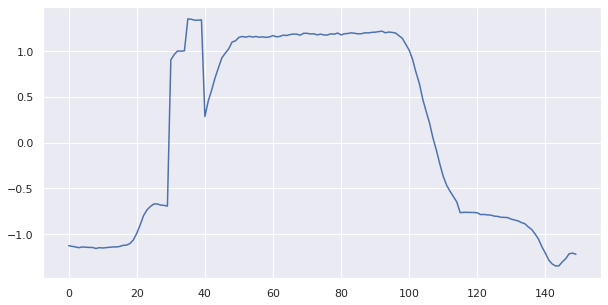

In [8]:
from evaluation.Plots import plot_CF, plot_CF_Original, plot_CF_Original_Closest
plot_CF(pop)

In [10]:
# extract statistics:
meanYDistance = logbook.chapters['stats_y_distance'].select("min")
#logbook.chapters['stats_y_distance','stats_x_distance','stats_changed_features','stats_gower'].select("avg")
meanXDistance = logbook.chapters['stats_x_distance'].select("min")
meanChanged = logbook.chapters['stats_changed_features'].select("min")

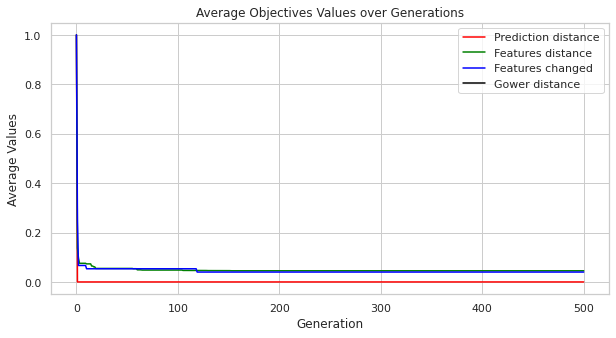

In [11]:
# plot statistics:
sns.set_style("whitegrid")
plt.plot(meanYDistance, color='red', label='Prediction distance')
plt.plot(meanXDistance, color='green', label='Features distance')
plt.plot(meanChanged, color='blue', label='Features changed')
plt.plot(meanGower, color='black', label='Gower distance')
plt.xlabel('Generation')
plt.ylabel('Average Values')
plt.title('Average Objectives Values over Generations')
plt.set_loglevel
plt.legend()
plt.show() 

(1, 150)
(1, 150)
[-1.1250133  -1.1313383  -1.1382884  -1.1466873  -1.1386387  -1.1414312
 -1.1436908  -1.1443789  -1.1549123  -1.1464212  -1.1497246  -1.1457227
 -1.1419403  -1.1384288  -1.1385201  -1.1329855  -1.1206946  -1.1185964
 -1.1005789  -1.0618869  -0.98877018 -0.89804927 -0.79586606 -0.73432104
 -0.69687043 -0.66992052 -0.66910759 -0.68194036 -0.68481332 -0.69305372
  0.90212727  0.96081657  0.99984881  0.99711268  1.0011424   1.3497851
  1.345473    1.335096    1.3353374   1.3387308   0.28436347  0.45409849
  0.57409933  0.70714616  0.8182297   0.92508286  0.97561574  1.0226481
  1.0969569   1.1102969   1.1479976   1.1575769   1.1498129   1.1594703
  1.1517029   1.157521    1.1494632   1.153298    1.1473326   1.1530236
  1.1671015   1.1542641   1.1576391   1.1720068   1.1678774   1.1783764
  1.1837646   1.1829012   1.1717443   1.192459    1.1921674   1.184896
  1.1869894   1.1746437   1.183216    1.1736466   1.1736466   1.1868374
  1.1821363   1.1953776   1.174863    1.1868

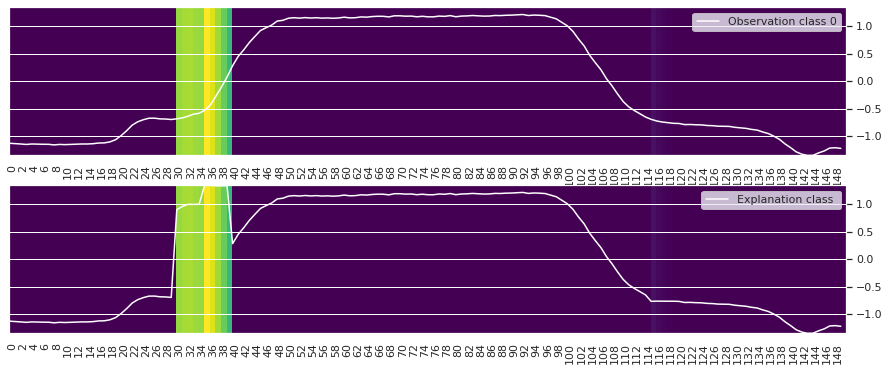

In [14]:
observation_x= observation_01
observation_y=label_01
plot_CF_Original(np.array(pop[0]), observation_x,observation_y)

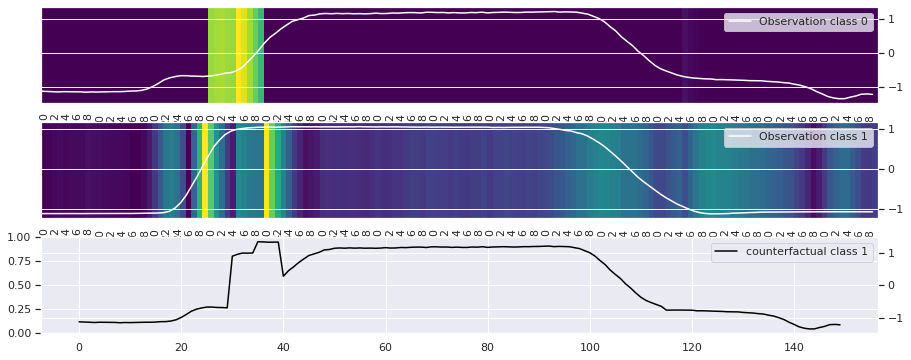

In [15]:
data= test_x[test_y != 0]
t=test_y[test_y != 0]
timeline_max=[]
mi_max=5
i= 0
i_max=0
for timeline in data: 
    mi = np.sum(np.abs(timeline.reshape(-1)- observation_x.reshape(-1) ))/150
    if mi <mi_max: 
        mi_max=mi
        timeline_max= timeline
        i_max=i
    i = i+1
plot_CF_Original_Closest(pop,observation_x, observation_y,timeline_max,t[i_max])

In [16]:
# Number Changes 
sal_01= np.count_nonzero(np.abs(observation_x.reshape(-1)-np.array(pop)[0][0].reshape(-1)).reshape(1,-1))
print('# Changes compared to Original', sal_01)
sal_02= np.count_nonzero(np.abs(timeline_max.reshape(-1)-np.array(pop)[0][0].reshape(-1)).reshape(1,-1))
print('# Changes compared to Closest', sal_02)



# Changes compared to Original 14
# Changes compared to Closest 150


In [17]:
from evaluation.metrics import redundancy, yNN

In [18]:
#TODO Check this out Currently max values everywhere
mlmodel = model 
counterfactuals = pop
original = observation_01 
print('YNN',yNN(counterfactuals, mlmodel,train_x,5))
print('Redundnacy',redundancy(original, counterfactuals, mlmodel))


YNN [[0.8]]
Redundnacy [14]


/media/jacqueline/Data/TSEvo/evaluation/metrics.py:126: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(mlmodel(input_)).detach().numpy()
/media/jacqueline/Data/TSEvo/evaluation/metrics.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(mlmodel(input_)).detach().numpy()
